In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [158]:
df=pd.read_csv('cs_students.csv')

df.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [159]:
df2=df.drop(['Student ID','Name'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             180 non-null    object 
 1   Age                180 non-null    int64  
 2   GPA                180 non-null    float64
 3   Major              180 non-null    object 
 4   Interested Domain  180 non-null    object 
 5   Projects           180 non-null    object 
 6   Future Career      180 non-null    object 
 7   Python             180 non-null    object 
 8   SQL                180 non-null    object 
 9   Java               180 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 14.2+ KB


In [160]:
df2['Interested Domain'].value_counts()

Interested Domain
Artificial Intelligence           19
Web Development                   19
Cybersecurity                     18
Mobile App Development            17
Database Management               16
Cloud Computing                   16
Data Science                      13
Machine Learning                  13
Computer Graphics                 13
Software Development              11
Software Engineering               5
Quantum Computing                  2
Bioinformatics                     2
Human-Computer Interaction         2
Biomedical Computing               2
Distributed Systems                1
Geographic Information Systems     1
Data Privacy                       1
Information Retrieval              1
Blockchain Technology              1
Computer Vision                    1
Data Mining                        1
Natural Language Processing        1
IoT (Internet of Things)           1
Game Development                   1
Network Security                   1
Digital Forensics   

In [161]:
#train classification model to predict the Python performance of students


In [162]:
#Encode Gender		Major	Interested Domain	Projects	Future Career	Python	SQL	Java

from sklearn.preprocessing import LabelEncoder

gender_ecoder=LabelEncoder()
df2['Gender']=gender_ecoder.fit_transform(df2['Gender'])

major_encoder=LabelEncoder()
df2['Major']=major_encoder.fit_transform(df2['Major'])

interested_domain_encoder=LabelEncoder()
df2['Interested Domain']=interested_domain_encoder.fit_transform(df2['Interested Domain'])

projects_encoder=LabelEncoder()
df2['Projects']=projects_encoder.fit_transform(df2['Projects'])

future_career_encoder=LabelEncoder()
df2['Future Career']=future_career_encoder.fit_transform(df2['Future Career'])

python_encoder=LabelEncoder()
df2['Python']=python_encoder.fit_transform(df2['Python'])

sql_encoder=LabelEncoder()
df2['SQL']=sql_encoder.fit_transform(df2['SQL'])

java_encoder=LabelEncoder()
df2['Java']=java_encoder.fit_transform(df2['Java'])

df2.head()


,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,21,3.5,0,0,8,21,1,1,2
1,0,20,3.2,0,10,15,7,0,1,2
2,1,22,3.8,0,24,21,29,1,1,0
3,0,21,3.7,0,26,26,32,2,1,1
4,1,23,3.4,0,7,40,18,0,2,1


In [163]:
#split x and y
Y=df2['Python']
X=df2.drop(columns=['Python'])

In [164]:
#split data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [165]:
#choose classification models
#logistics regression, decision tree, random forest, svm, gaussian naives bayes

In [166]:
#logistics regression
from sklearn.linear_model import LogisticRegression
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,Y_train)
Y_pred_log_reg=log_reg_model.predict(X_test)

#calculate accuracy,precision, recall, f1-score
accuracy_log_reg=accuracy_score(Y_test,Y_pred_log_reg)
print("Logistics Regression Accuracy:",accuracy_log_reg)




#classification report
print("Logistics Regression Classification Report:")
print(classification_report(Y_test,Y_pred_log_reg))




Logistics Regression Accuracy: 0.6944444444444444
Logistics Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.30      0.43      0.35         7
           2       0.86      0.71      0.77        17

    accuracy                           0.69        36
   macro avg       0.66      0.66      0.65        36
weighted avg       0.74      0.69      0.71        36



/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred_dt=dt_model.predict(X_test)
accuracy_dt=accuracy_score(Y_test,Y_pred_dt)
print("Decision Tree Accuracy:",accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(Y_test,Y_pred_dt))


Decision Tree Accuracy: 0.8888888888888888
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.71      0.71      0.71         7
           2       0.94      0.88      0.91        17

    accuracy                           0.89        36
   macro avg       0.86      0.87      0.86        36
weighted avg       0.89      0.89      0.89        36



In [168]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred_rf=rf_model.predict(X_test)
accuracy_rf=accuracy_score(Y_test,Y_pred_rf)
print("Random Forest Accuracy:",accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(Y_test,Y_pred_rf))


Random Forest Accuracy: 0.9722222222222222
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92         7
           2       0.94      1.00      0.97        17

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



In [169]:
#support vector machine classifier
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,Y_train)
Y_pred_svm=svm_model.predict(X_test)
accuracy_svm=accuracy_score(Y_test,Y_pred_svm)
print("Support Vector Machine Accuracy:",accuracy_svm)
print("Support Vector Machine Classification Report:")
print(classification_report(Y_test,Y_pred_svm))


Support Vector Machine Accuracy: 0.3055555555555556
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        12
           1       0.27      1.00      0.42         7
           2       0.25      0.06      0.10        17

    accuracy                           0.31        36
   macro avg       0.34      0.44      0.28        36
weighted avg       0.34      0.31      0.24        36



In [170]:
#gaussian naives bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)
Y_pred_gnb=gnb_model.predict(X_test)
accuracy_gnb=accuracy_score(Y_test,Y_pred_gnb)
print("Gaussian Naives Bayes Accuracy:",accuracy_gnb)
print("Gaussian Naives Bayes Classification Report:")
print(classification_report(Y_test,Y_pred_gnb))

Gaussian Naives Bayes Accuracy: 0.7222222222222222
Gaussian Naives Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.36      0.57      0.44         7
           2       0.83      0.59      0.69        17

    accuracy                           0.72        36
   macro avg       0.71      0.72      0.70        36
weighted avg       0.77      0.72      0.73        36



In [171]:
#tune gaussian naives bayes model using grid search cv
from sklearn.model_selection import GridSearchCV
param_grid={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5],}
grid_search=GridSearchCV(estimator=gnb_model,param_grid=param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print("Best Parameters for Gaussian Naives Bayes:",grid_search.best_params_)
best_gnb_model=grid_search.best_estimator_

#performance of bets model
Y_pred_best_gnb=best_gnb_model.predict(X_test)
accuracy_best_gnb=accuracy_score(Y_test,Y_pred_best_gnb)
print("Best Gaussian Naives Bayes Accuracy:",accuracy_best_gnb)
print("Best Gaussian Naives Bayes Classification Report:")
print(classification_report(Y_test,Y_pred_best_gnb))


Best Parameters for Gaussian Naives Bayes: {'var_smoothing': 1e-09}
Best Gaussian Naives Bayes Accuracy: 0.7222222222222222
Best Gaussian Naives Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.36      0.57      0.44         7
           2       0.83      0.59      0.69        17

    accuracy                           0.72        36
   macro avg       0.71      0.72      0.70        36
weighted avg       0.77      0.72      0.73        36



In [172]:
#tune decision tree classifier
from sklearn.model_selection import GridSearchCV
param_grid_dt={'max_depth':[6,7,8],'min_samples_split':[3,4,5], 'min_samples_leaf':[1,2,3]}

grid_search_dt=GridSearchCV(estimator=dt_model,param_grid=param_grid_dt,cv=5)
grid_search_dt.fit(X_train,Y_train)
print("Best Parameters for Decision Tree:",grid_search_dt.best_params_)
best_dt_model=grid_search_dt.best_estimator_

#performance of best decision tree model
Y_pred_best_dt=best_dt_model.predict(X_test)
accuracy_best_dt=accuracy_score(Y_test,Y_pred_best_dt)
print("Best Decision Tree Accuracy:",accuracy_best_dt)
print("Best Decision Tree Classification Report:")
print(classification_report(Y_test,Y_pred_best_dt))


Best Parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Decision Tree Accuracy: 0.8888888888888888
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.71      0.71      0.71         7
           2       0.94      0.94      0.94        17

    accuracy                           0.89        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.89      0.89      0.89        36



In [173]:
#make a prediction for a new student
new_student=np.array([[1,21,3.5,0,0,8,21,1,2]])
new_student_prediction=best_dt_model.predict(new_student)
print("Prediction for new student",new_student_prediction[0])

print(python_encoder.classes_[new_student_prediction[0]])

Prediction for new student 1
Strong


/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [174]:


new_student=np.array([[1,23,3.4,0,7,40,18,2,1]])
new_student_prediction=best_dt_model.predict(new_student)
print("Prediction for new student",new_student_prediction[0])

print(python_encoder.classes_[new_student_prediction[0]])

Prediction for new student 0
Average


/Users/nirmal/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [175]:
X.head()

,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,SQL,Java
0,1,21,3.5,0,0,8,21,1,2
1,0,20,3.2,0,10,15,7,1,2
2,1,22,3.8,0,24,21,29,1,0
3,0,21,3.7,0,26,26,32,1,1
4,1,23,3.4,0,7,40,18,2,1


In [176]:
#clustering students based on their performance in Python, SQL, and Java 
from sklearn.cluster import KMeans

n_clusters=4
kmeans_model=KMeans(n_clusters=n_clusters,random_state=42)
kmeans_model.fit(df2[['Python','SQL','Java']])
cluster_labels=kmeans_model.labels_
df2['Cluster']=cluster_labels
print(df2.head())

   Gender  Age  GPA  Major  Interested Domain  Projects  Future Career  \
0       1   21  3.5      0                  0         8             21   
1       0   20  3.2      0                 10        15              7   
2       1   22  3.8      0                 24        21             29   
3       0   21  3.7      0                 26        26             32   
4       1   23  3.4      0                  7        40             18   

   Python  SQL  Java  Cluster  
0       1    1     2        2  
1       0    1     2        0  
2       1    1     0        3  
3       2    1     1        1  
4       0    2     1        0  


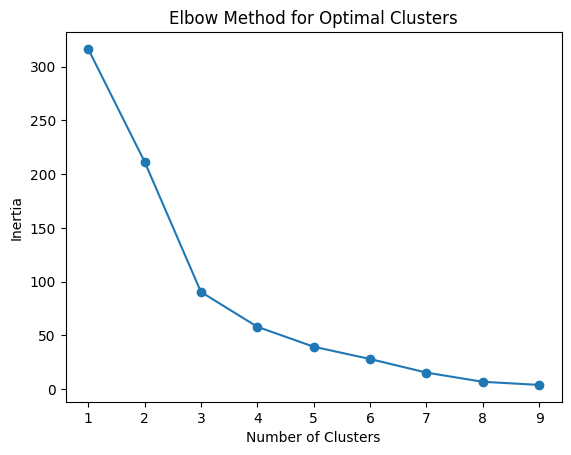

In [177]:
#elbow methoid to find optimal number of clusters
inertia_values=[]
k_range=range(1,10)
for k in k_range:
    kmeans_model=KMeans(n_clusters=k,random_state=42)
    kmeans_model.fit(df2[['Python','SQL','Java']])
    inertia_values.append(kmeans_model.inertia_)
plt.plot(k_range,inertia_values,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

Text(0, 0.5, 'PCA Component 2')

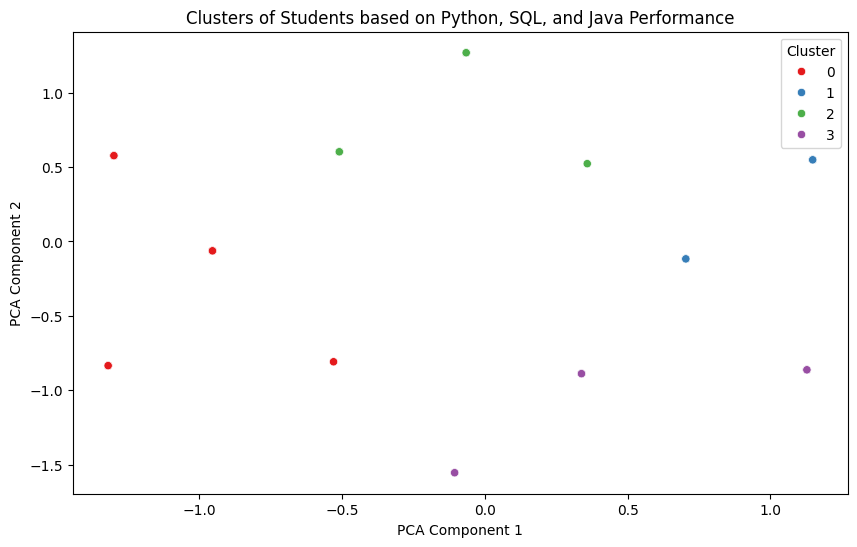

In [178]:
#visualise clusters
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df2_pca=pca.fit_transform(df2[['Python','SQL','Java']])
df2['PCA1']=df2_pca[:,0]
df2['PCA2']=df2_pca[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2,x='PCA1',y='PCA2',hue='Cluster',palette='Set1')
plt.title('Clusters of Students based on Python, SQL, and Java Performance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')